Compare the positions, sizes, position angles, and aspect ratios of the 100 largest galaxies in the [WXSC](https://vislab.idia.ac.za/research) against the quantities in Hyperleda.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import pandas as pd
from astropy.table import Table
from astrometry.libkd.spherematch import match_radec

In [3]:
import LSLGA.io
import LSLGA.misc

In [4]:
sns, _ = LSLGA.misc.plot_style()
%matplotlib inline

In [32]:
tiles = LSLGA.io.read_desi_tiles(verbose=True)
leda = LSLGA.io.read_hyperleda(verbose=True)
leda['IN_DESI'] = LSLGA.misc.is_point_in_desi(tiles, leda['RA'], leda['DEC']).astype(bool)

Read 20070 DESI tiles from /Users/ioannis/research/projects/LSLGA/sample/desi-tiles.fits
Read 1436176 objects from /Users/ioannis/research/projects/LSLGA/sample/v4.0/hyperleda-d25min10-18nov14.fits
Read 1436176 objects from /Users/ioannis/research/projects/LSLGA/sample/v4.0/hyperleda-d25min10-18nov14-allwise.fits
  Identified 1379531/1436176 (96.06%) objects with AllWISE photometry.


Read the WXSC catalog.

In [6]:
wxscfile = os.path.join(os.getenv('CATALOGS_DIR'), 'wxsc-largest-galaxies', 'Table_1.tbl')
names = ['wxsc_id', 'galaxy', 'ra', 'dec', 'ba', 'pa', 
         'W1_radius', 'W1_mag', 'W1_mag_err',
         'W2_radius', 'W2_mag', 'W2_mag_err',
         'W3_radius', 'W3_mag', 'W3_mag_err',
         'W4_radius', 'W4_mag', 'W4_mag_err',
         'W1_W2', 'W1_W2_err', 'W2_W3', 'W2_W3_err']
dtype = {'wxsc_id': str, 'galaxy': str, 'ra': np.float64, 'dec': np.float64, 
         'ba': np.float32, 'pa': np.float32, 
         'W1_radius': str, 'W1_mag': str, 'W1_mag_err': str,
         'W2_radius': str, 'W2_mag': str, 'W2_mag_err': str,
         'W3_radius': str, 'W3_mag': str, 'W3_mag_err': str,
         'W4_radius': str, 'W4_mag': str, 'W4_mag_err': str,
         'W1_W2': str, 'W1_W2_err': str, 'W2_W3': str, 'W2_W3_err': str}

In [7]:
data = pd.read_csv(wxscfile, delimiter='|', comment='#', na_values='null', skiprows=0, 
                   names=names, dtype=dtype, skip_blank_lines=True,
                   warn_bad_lines=True, error_bad_lines=False)
data

,wxsc_id,galaxy,ra,dec,ba,pa,W1_radius,W1_mag,W1_mag_err,W2_radius,...,W3_radius,W3_mag,W3_mag_err,W4_radius,W4_mag,W4_mag_err,W1_W2,W1_W2_err,W2_W3,W2_W3_err
0,1,LMC,79.64101,-68.81836,1.00,0.000000,300.00,-1.93,0.01,300.00,...,300.00,-4.78,0.05,300.00,-7.15,0.05,0.06,0.02,2.79,0.06
1,2,SMC,13.18660,-72.82860,1.00,0.000000,166.67,0.56,0.01,166.67,...,166.67,-0.93,0.01,166.67,-3.48,0.01,-0.06,0.02,1.55,0.02
2,3,MESSIER31,10.68479,41.26907,0.35,37.299999,111.44,0.08,0.01,111.44,...,111.44,-1.95,0.01,111.44,-3.09,0.01,-0.05,0.02,2.08,0.02
3,4,MESSIER33,23.46204,30.66022,0.59,18.900000,31.64,3.09,0.01,31.64,...,31.64,-0.17,0.01,31.64,-1.94,0.01,0.07,0.02,3.19,0.02
4,5,NGC0253,11.88844,-25.28827,0.28,53.000000,21.13,3.46,0.01,21.13,...,21.13,-0.54,0.04,21.13,-2.94,0.04,0.19,0.02,3.81,0.05
5,6,NGC5128,201.36481,-43.01954,0.77,33.799999,19.64,3.01,0.01,19.64,...,19.64,0.45,0.01,19.64,-1.25,0.01,0.03,0.02,2.53,0.02
6,7,NGC0055,3.72192,-39.19775,0.19,108.900002,19.49,5.45,0.01,19.49,...,19.49,2.80,0.01,19.49,0.29,0.01,0.09,0.02,2.56,0.02
7,8,MESSIER81,148.88837,69.06528,0.56,156.699997,14.67,3.60,0.01,14.67,...,14.67,1.84,0.03,14.67,0.45,0.03,-0.01,0.02,1.77,0.04
8,9,MESSIER101,210.80225,54.34893,0.92,33.299999,14.50,5.22,0.01,14.50,...,14.50,1.62,0.01,14.50,-0.28,0.01,0.12,0.02,3.48,0.02
9,10,NGC4945,196.36409,-49.46816,0.37,43.400002,12.98,4.07,0.01,12.98,...,12.98,0.31,0.01,12.98,-1.56,0.01,0.20,0.02,3.56,0.02


In [33]:
m1, m2, d12 = match_radec(data['ra'].values, data['dec'].values, leda['RA'], leda['DEC'],
                          10.0/3600.0, nearest=False)

In [34]:
srt = np.argsort(m1)
mdata = data.iloc[m1[srt]]
mleda = leda[m2[srt]]
mdata

,wxsc_id,galaxy,ra,dec,ba,pa,W1_radius,W1_mag,W1_mag_err,W2_radius,...,W3_radius,W3_mag,W3_mag_err,W4_radius,W4_mag,W4_mag_err,W1_W2,W1_W2_err,W2_W3,W2_W3_err
2,3,MESSIER31,10.68479,41.26907,0.35,37.299999,111.44,0.08,0.01,111.44,...,111.44,-1.95,0.01,111.44,-3.09,0.01,-0.05,0.02,2.08,0.02
3,4,MESSIER33,23.46204,30.66022,0.59,18.900000,31.64,3.09,0.01,31.64,...,31.64,-0.17,0.01,31.64,-1.94,0.01,0.07,0.02,3.19,0.02
4,5,NGC0253,11.88844,-25.28827,0.28,53.000000,21.13,3.46,0.01,21.13,...,21.13,-0.54,0.04,21.13,-2.94,0.04,0.19,0.02,3.81,0.05
6,7,NGC0055,3.72192,-39.19775,0.19,108.900002,19.49,5.45,0.01,19.49,...,19.49,2.80,0.01,19.49,0.29,0.01,0.09,0.02,2.56,0.02
7,8,MESSIER81,148.88837,69.06528,0.56,156.699997,14.67,3.60,0.01,14.67,...,14.67,1.84,0.03,14.67,0.45,0.03,-0.01,0.02,1.77,0.04
8,9,MESSIER101,210.80225,54.34893,0.92,33.299999,14.50,5.22,0.01,14.50,...,14.50,1.62,0.01,14.50,-0.28,0.01,0.12,0.02,3.48,0.02
9,10,NGC4945,196.36409,-49.46816,0.37,43.400002,12.98,4.07,0.01,12.98,...,12.98,0.31,0.01,12.98,-1.56,0.01,0.20,0.02,3.56,0.02
10,11,IC0342,56.70144,68.09635,0.95,75.500000,12.98,3.97,0.01,12.98,...,12.98,0.23,0.01,12.98,-1.81,0.01,0.08,0.02,3.66,0.02
11,12,NGC1316,50.67380,-37.20796,0.64,34.700001,12.82,5.08,0.01,10.03,...,3.38,4.49,0.01,3.38,3.24,0.02,-0.06,0.02,0.65,0.02
12,13,MESSIER49,187.44489,8.00050,0.77,152.000000,12.75,4.95,0.01,9.73,...,2.58,4.82,0.01,2.58,3.92,0.03,-0.13,0.02,0.26,0.02


Compare bulk properties.

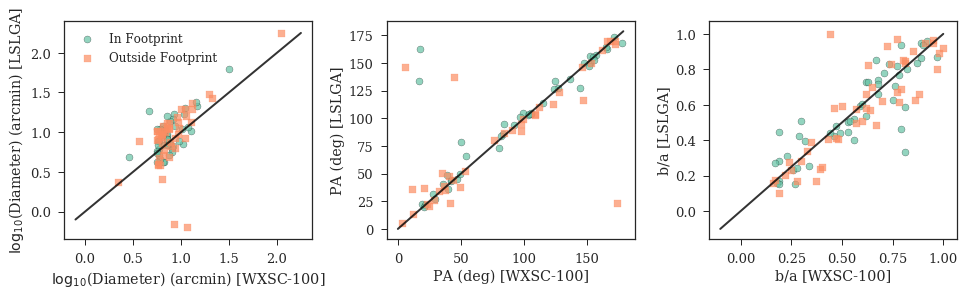

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for thisax, label, xx, yy in zip(
    ax, (r'$\log_{10}$(Diameter) (arcmin)', 'PA (deg)', 'b/a'),
    (np.log10(mdata['W1_radius'].values.astype('f4')), 
     mdata['pa'].values.astype('f4'),
     mdata['ba'].values.astype('f4')),
    (np.log10(mleda['D25']), mleda['PA'], mleda['BA'])):
    
    thisax.scatter(xx[mleda['IN_DESI']], yy[mleda['IN_DESI']], 
                   label='In Footprint', alpha=0.7, edgecolor='k')
    thisax.scatter(xx[~mleda['IN_DESI']], yy[~mleda['IN_DESI']], marker='s',
                   label='Outside Footprint', alpha=0.7)
    thisax.set_xlabel('{} [WXSC-100]'.format(label))
    thisax.set_ylabel('{} [LSLGA]'.format(label))

    mx = np.nanmax((xx, yy))
    thisax.plot([-0.1, mx], [-0.1, mx], color='k', lw=2, alpha=0.8)
    
ax[0].legend(fontsize=12)
plt.subplots_adjust(wspace=0.3)

Find the largest discrepancies.

In [56]:
d_wxsc = np.log10(mdata['W1_radius'].values.astype('f4'))
d_lslga = np.log10(mleda['D25'])
ddist = d_wxsc/d_lslga-1
cut = ddist > 0.05
srt = np.argsort(ddist[cut])[::-1]

diff = Table()
diff['LSLGA_GALAXY'] = mleda['GALAXY'][srt]
diff['WXSC_GALAXY'] = mdata.iloc[srt]['galaxy']
diff['RA'] = mleda['RA'][srt]
diff['DEC'] = mleda['DEC'][srt]
diff['DIAM_WXSC'] = d_wxsc[srt]
diff['DIAM_LSLGA'] = d_lslga[srt]
diff['PA_WXSC'] = mdata['pa'].values[srt]
diff['PA_LSLGA'] = mleda['PA'][srt]
diff['BA_WXSC'] = mdata['ba'].values[srt]
diff['BA_LSLGA'] = mleda['BA'][srt]
diff['IN_DESI'] = mleda['IN_DESI'][srt]

In [57]:
print('In DESI footprint')
diff[diff['IN_DESI']]

In DESI footprint


LSLGA_GALAXY,WXSC_GALAXY,RA,DEC,DIAM_WXSC,DIAM_LSLGA,PA_WXSC,PA_LSLGA,BA_WXSC,BA_LSLGA,IN_DESI
bytes29,object,float64,float64,float32,float32,float32,float32,float32,float32,bool
NGC4486,MESSIER87,187.706364,12.3905194,1.0157788,0.852,152.9,nan,0.79,0.937562,True
NGC4406,MESSIER86,186.54908100000003,12.945809800000001,1.0748165,1.062,127.2,127.79,0.62,0.73113906,True
NGC4736,NGC4736,192.721248,41.1203028,0.98407704,0.88900006,105.6,105.0,0.89,0.8629785,True
NGC4472,MESSIER49,187.44453600000003,7.9997240000000005,1.1055102,1.0090001,152.0,156.4,0.77,0.82035154,True
NGC4258,MESSIER106,184.7399355,47.3038816,1.0281644,1.23,152.0,150.0,0.46,0.4265795,True
NGC3031,MESSIER81,148.88815649999998,69.0652757,1.1664301,1.335,156.7,157.0,0.56,0.519996,True
NGC2403,NGC2403,114.2142375,65.60242029999999,1.0390173,1.3,124.1,126.33,0.53,0.5046613,True
NGC0598,MESSIER33,23.462120999999996,30.659925199999996,1.5002365,1.793,18.9,22.67,0.59,0.5915616,True
NGC5457,MESSIER101,210.80236799999997,54.349022999999995,1.161368,1.3800001,33.3,nan,0.92,0.9616123,True


In [58]:
print('Outside DESI footprint')
diff[~diff['IN_DESI']]

Outside DESI footprint


LSLGA_GALAXY,WXSC_GALAXY,RA,DEC,DIAM_WXSC,DIAM_LSLGA,PA_WXSC,PA_LSLGA,BA_WXSC,BA_LSLGA,IN_DESI
bytes29,object,float64,float64,float32,float32,float32,float32,float32,float32,bool
NGC0247,NGC0247,11.7857175,-20.760449899999998,1.0374265,1.2939999,171.9,167.44,0.3,0.2818383,False
PGC009892,MAFFEI1,39.147749999999995,59.6545833,1.0622058,-0.19700006,89.3,nan,0.77,0.9727472,False
NGC1532,NGC1532,63.018042,-32.87419439999999,0.97497195,1.052,32.2,34.22,0.24,0.2786121,False
NGC4594,MESSIER104,189.997701,-11.6230104,1.0429691,0.92700005,90.7,89.3,0.46,0.5807644,False
NGC5236,NGC5236,204.2539005,-29.8656261,0.96988165,1.1340001,161.4,nan,0.95,0.96605086,False
IC0342,IC0342,56.7021255,68.09609259999999,1.1132747,1.296,75.5,nan,0.95,0.9506048,False
NGC0253,NGC0253,11.8879665,-25.2884419,1.3248994,1.428,53.0,52.48,0.28,0.17100152,False
NGC0300,NGC0300,13.723024500000001,-37.6844766,1.0013009,1.2880001,123.2,113.23,0.77,0.6729767,False
NGC4945,NGC4945,196.363761,-49.4679088,1.1132747,1.368,43.4,43.83,0.37,0.17258379,False


Which galaxies don't match.

In [30]:
missing = np.arange(len(data))
missing = np.delete(missing, m1)
print(missing)
data.iloc[missing]

[  0   1   5   6  17  24  32  34  40  50  56  57 100 103]


,wxsc_id,galaxy,ra,dec,ba,pa,W1_radius,W1_mag,W1_mag_err,W2_radius,...,W3_radius,W3_mag,W3_mag_err,W4_radius,W4_mag,W4_mag_err,W1_W2,W1_W2_err,W2_W3,W2_W3_err
0,1,LMC,79.64101,-68.81836,1.00,0.000000,300.00,-1.93,0.01,300.00,...,300.00,-4.78,0.05,300.00,-7.15,0.05,0.06,0.02,2.79,0.06
1,2,SMC,13.18660,-72.82860,1.00,0.000000,166.67,0.56,0.01,166.67,...,166.67,-0.93,0.01,166.67,-3.48,0.01,-0.06,0.02,1.55,0.02
5,6,NGC5128,201.36481,-43.01954,0.77,33.799999,19.64,3.01,0.01,19.64,...,19.64,0.45,0.01,19.64,-1.25,0.01,0.03,0.02,2.53,0.02
6,7,NGC0055,3.72192,-39.19775,0.19,108.900002,19.49,5.45,0.01,19.49,...,19.49,2.80,0.01,19.49,0.29,0.01,0.09,0.02,2.56,0.02
17,18,NGC2403,114.20885,65.60103,0.53,124.099998,10.94,5.69,0.01,10.94,...,10.94,2.26,0.01,10.94,0.28,0.01,0.10,0.02,3.33,0.02
24,25,NGC6822,296.24115,-14.80224,0.82,20.500000,9.53,5.80,0.01,9.53,...,9.53,3.50,0.01,9.53,1.20,0.02,0.00,0.02,2.30,0.02
32,33,NGC4236,184.17477,69.46757,0.30,158.000000,8.66,7.91,0.01,8.66,...,8.66,5.97,0.02,8.66,3.09,0.03,-0.08,0.02,2.02,0.03
34,35,Maffei2,40.47926,59.60422,0.44,27.700001,8.50,4.76,0.01,8.50,...,8.50,1.07,0.01,8.50,-1.03,0.01,0.18,0.02,3.51,0.02
40,41,ESO270-G017,203.70584,-45.54919,0.18,107.500000,7.94,8.55,0.01,6.05,...,6.05,6.27,0.02,6.05,3.98,0.03,-0.17,0.02,2.45,0.03
50,51,IC0010,5.07196,59.30388,0.87,125.800003,7.33,5.11,0.01,7.00,...,3.87,2.35,0.01,3.87,-0.33,0.01,0.07,0.02,2.69,0.02
